In [19]:
import pandas as pd

df = pd.read_csv("diamonds.csv", encoding="utf-8", sep=",")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [20]:
df = df.drop(columns=["Unnamed: 0"])
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [21]:
df.describe(include="O")

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


В датасете отсутствуют дубликаты и пропуски:

In [22]:
print(len(df))
df = df.drop_duplicates()
df.info()

53940
<class 'pandas.core.frame.DataFrame'>
Index: 53794 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53794 non-null  float64
 1   cut      53794 non-null  object 
 2   color    53794 non-null  object 
 3   clarity  53794 non-null  object 
 4   depth    53794 non-null  float64
 5   table    53794 non-null  float64
 6   price    53794 non-null  int64  
 7   x        53794 non-null  float64
 8   y        53794 non-null  float64
 9   z        53794 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


Визуализируем зависимость между весом и ценой.
Есть несколько алмазов с большой массой, лежащие вдалеке от общего тренда. Возможно, их можно считать выбросами.

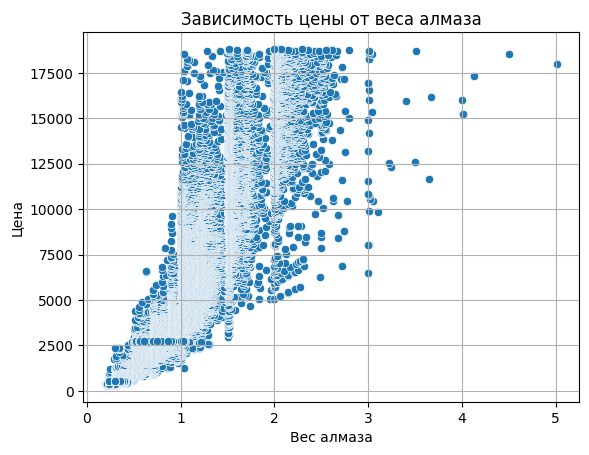

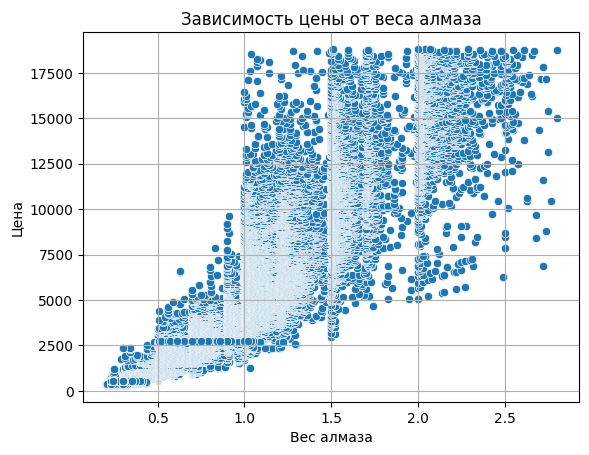

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='carat', y='price', data=df)
plt.xlabel('Вес алмаза')
plt.ylabel('Цена')
plt.title('Зависимость цены от веса алмаза')
plt.grid(True)
plt.show()

df = df[df["carat"] < 3] # удалить сильно далёкие точки от общего тренда
sns.scatterplot(x='carat', y='price', data=df)
plt.xlabel('Вес алмаза')
plt.ylabel('Цена')
plt.title('Зависимость цены от веса алмаза')
plt.grid(True)
plt.show()

Посмотрим на "коробки с усами" для числовых признаков

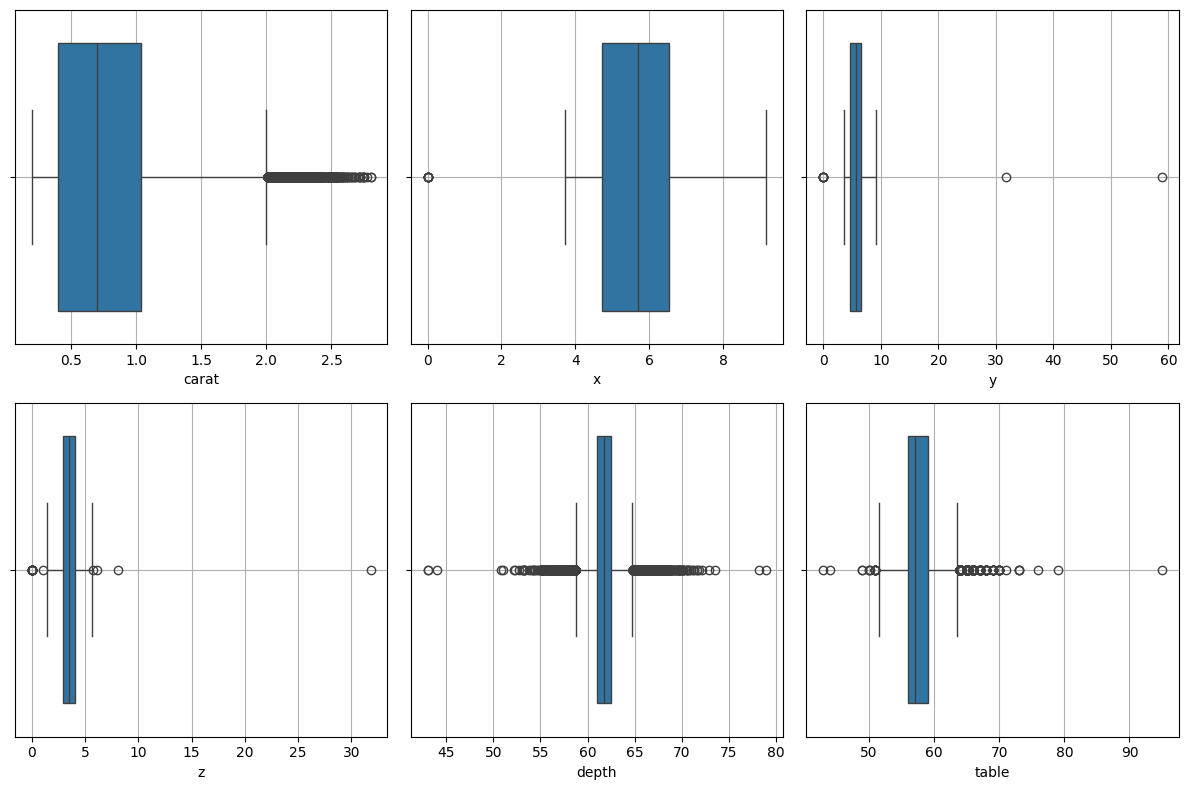

In [24]:
def draw_boxplots():
    numeric_features = ['carat', 'x', 'y', 'z', 'depth', 'table']

    plt.figure(figsize=(12, 8))
    for i, feature in enumerate(numeric_features, 1):
        plt.subplot(2, 3, i)
        sns.boxplot(x=feature, data=df)
        plt.xlabel(feature)
        plt.grid(True)

    plt.tight_layout()
    plt.show()

draw_boxplots()

Удалим объекты, которые сильно удалены от границ квартилей

Удалится 1789 строк


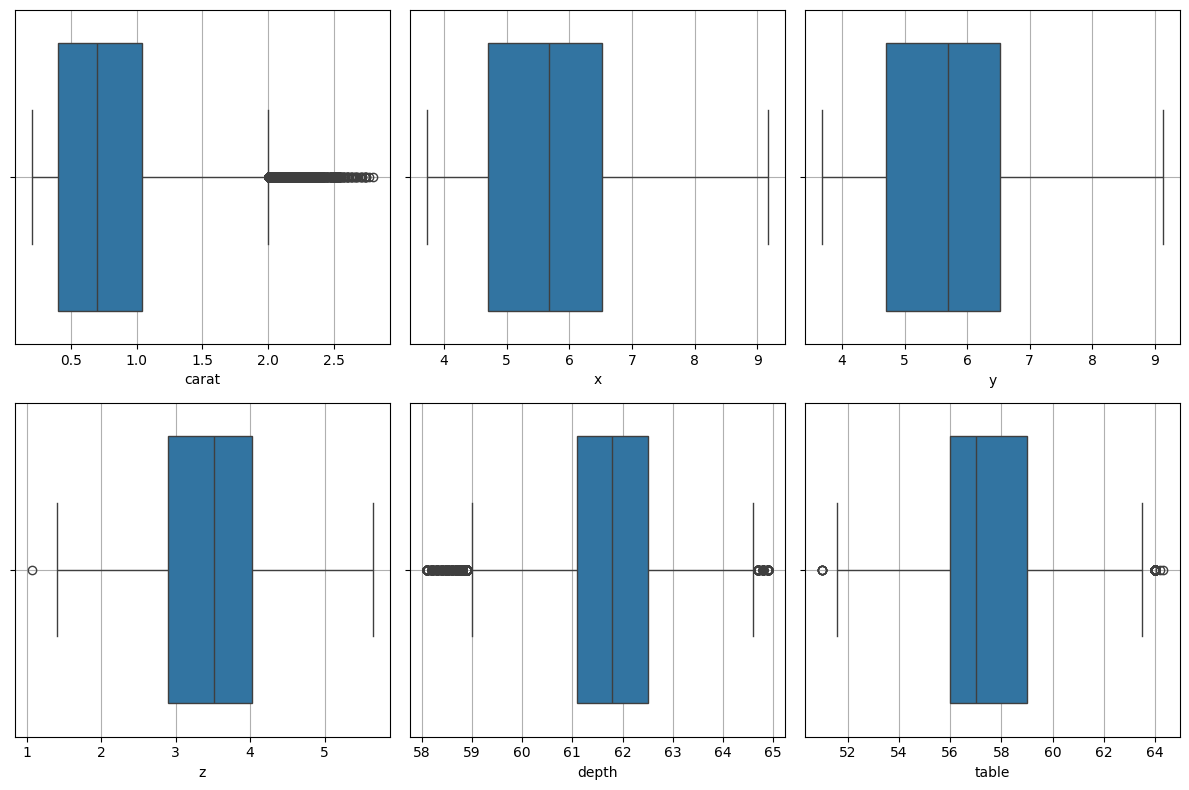

In [25]:
mask = (df["table"] > 50) & (df["table"] < 65)
mask &= (df["depth"] > 58) & (df["depth"] < 65)
mask &= (df["z"] > 1) & (df["z"] < 7)
mask &= (df["y"] > 1) & (df["y"] < 10)
mask &= (df["x"] > 1)
mask &= (df["y"] > 1) & (df["y"] < 10)

print(f"Удалится {len(mask[mask==False])} строк")

df = df[mask]
draw_boxplots()

Рассмотрим категориальные признаки, выберем наиболее подходящий способ кодирования для каждого.
Закодируем с помощью Ordinal кодирования, посколько у всех категориальных столбцов есть отношение порядка

In [26]:
from sklearn.preprocessing import OrdinalEncoder

cut_encoder = OrdinalEncoder(categories=[['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']])
clarity_encoder = OrdinalEncoder(categories=[['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']])
color_encoder = OrdinalEncoder(categories=[['J', 'I', 'H', 'G', 'F', 'E', 'D']])

df_before_Encoding = df.copy()

df['cut_encoded'] = cut_encoder.fit_transform(df[['cut']])
df['clarity_encoded'] = clarity_encoder.fit_transform(df[['clarity']])
df['color_encoded'] = color_encoder.fit_transform(df[['color']])

# Удаляем исходные категориальные столбцы
df = df.drop(columns=['cut', 'color', 'clarity'])
df.head()

,carat,depth,table,price,x,y,z,cut_encoded,clarity_encoded,color_encoded
0,0.23,61.5,55.0,326,3.95,3.98,2.43,4.0,1.0,5.0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,3.0,2.0,5.0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,3.0,3.0,1.0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1.0,1.0,0.0
5,0.24,62.8,57.0,336,3.94,3.96,2.48,2.0,5.0,0.0


Построим матрицу корреляции.
Как видим, поля x,y,z идеально коррелируют между собой, значит можно использовать только одно любое значение из них. 
Цена хорошо коррелирует только с весом и с линейными размерами.

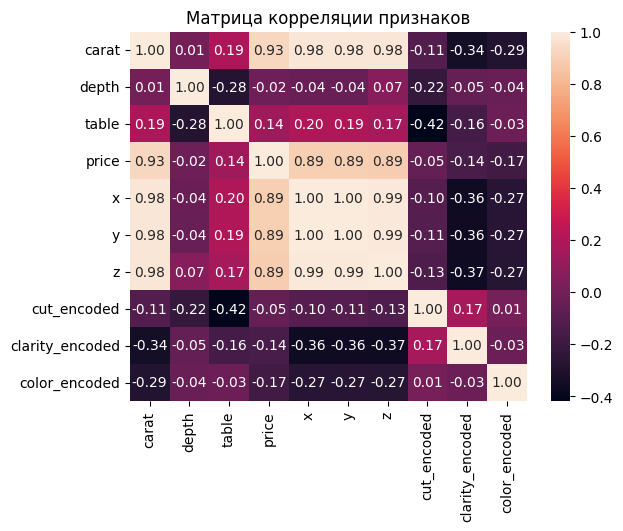

In [27]:
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f')
plt.title("Матрица корреляции признаков")
plt.show()

Используем MinMax нормализацию

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df[["carat", "x", "price", "clarity_encoded", "color_encoded", "cut_encoded"]]), columns=[["carat", "x", "price", "clarity", "color", "cut"]])

df_ordinal_scaled = df.copy()
df.head()

,carat,x,price,clarity,color,cut
0,0.011538,0.040441,0.000000,0.142857,0.833333,1.00
1,0.003846,0.029412,0.000000,0.285714,0.833333,0.75
2,0.034615,0.086397,0.000433,0.428571,0.166667,0.75
3,0.042308,0.112132,0.000487,0.142857,0.000000,0.25
4,0.015385,0.038603,0.000541,0.714286,0.000000,0.50


Построим линейную регрессию. Оценим результат с помощью метрик r2 и MSE.

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

X = df.drop(columns=['price'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Оценим модель
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R2: {r2:.4f}")
print(f"MSE: {mse:.2f}")


R2: 0.9176
MSE: 0.00


/tmp/ipykernel_66062/940308936.py:5: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = df.drop(columns=['price'])


Построим полиномиальную регрессию. Сравним результаты с предыдущими.
Вывод: модель полиномиальной регрессии лучше.

In [30]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2)

# Преобразуем признаки в полиномиальные
X_poly = poly_features.fit_transform(X_train)

poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)

X_test_poly = poly_features.transform(X_test)

y_pred_poly = poly_model.predict(X_test_poly)

# Оценим модель
r2_poly = r2_score(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)

print(f"R2: {r2_poly:.4f}")
print(f"MSE: {mse_poly:.2f}")

R2: 0.9653
MSE: 0.00


### Сравните результаты при различных вариантах работы с категориальными признаками: удаление, кодирование OrdinalEncoder, OneHotEncoding. Объясните полученные результаты.

In [31]:
X = df.drop(columns=['price', 'cut', 'color', 'clarity'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Оценим модель
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R2: {r2:.4f}")
print(f"MSE: {mse:.2f}")

R2: 0.8717
MSE: 0.01


/tmp/ipykernel_66062/1316098282.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = df.drop(columns=['price', 'cut', 'color', 'clarity'])


Удаление признаков ухудшает модель

Закодируем с помощью OneHot

In [32]:
df_encoded = pd.get_dummies(df_before_Encoding, columns=['cut', 'color', 'clarity'])

print(*df_encoded.columns)
df_encoded.head()

carat depth table price x y z cut_Fair cut_Good cut_Ideal cut_Premium cut_Very Good color_D color_E color_F color_G color_H color_I color_J clarity_I1 clarity_IF clarity_SI1 clarity_SI2 clarity_VS1 clarity_VS2 clarity_VVS1 clarity_VVS2


,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,False,False,True,...,False,False,False,False,False,True,False,False,False,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,False,False,False,...,True,False,False,False,False,False,False,True,False,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,False,True,False,...,False,True,False,False,False,True,False,False,False,False
5,0.24,62.8,57.0,336,3.94,3.96,2.48,False,False,False,...,False,True,False,False,False,False,False,False,False,True


Нормализуем

In [33]:
df_encoded = df_encoded.drop(columns=['depth', 'table', 'y', 'z'])

scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df_encoded), columns=[df_encoded.columns])

df.head()

,carat,price,x,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.011538,0.000000,0.040441,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.003846,0.000000,0.029412,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.034615,0.000433,0.086397,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.042308,0.000487,0.112132,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.015385,0.000541,0.038603,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


OneHot кодирование хуже Ordinal, но лучше, чем вообще отсутствие категориальных признаков

In [34]:
X = df.drop(columns=['price'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Оценим модель
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R2: {r2:.4f}")
print(f"MSE: {mse:.2f}")

R2: 0.9283
MSE: 0.00


/tmp/ipykernel_66062/2137248641.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = df.drop(columns=['price'])


__Вывод:__ Поскольку существует отношение порядка, Ordinal encoder подходит лучше всего.

## Используем SGDRegressor и оцените результат.

In [35]:
from sklearn.linear_model import SGDRegressor

X = df_ordinal_scaled.drop(columns=['price'])
y = df_ordinal_scaled['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sgd_regressor = SGDRegressor(max_iter=100, random_state=42)
sgd_regressor.fit(X_train, y_train)

y_pred = sgd_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"R2: {r2:.2f}")
print(f"MSE: {mse:.2f}")

/tmp/ipykernel_66062/771929252.py:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = df_ordinal_scaled.drop(columns=['price'])
/home/demyan/Документы/Projects/python/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R2: 0.89
MSE: 0.01


## Используйте другой тип регрессии (на ваш выбор) и сравните результаты.
Я выбрал Lasso регрессию

In [36]:
from sklearn.linear_model import Lasso

lasso_regressor = Lasso(alpha=0.01, random_state=42)
lasso_regressor.fit(X_train, y_train)
y_pred = lasso_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"R2: {r2:.2f}")
print(f"MSE: {mse:.2f}")

R2: 0.78
MSE: 0.01


__Вывод:__ Наилучший результат показала полиномиальная регрессия с OrderEncoding